In [6]:

!pip install scipy
!pip install sckit-learn
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn


In [7]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install statsmodels
!pip install nltk

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
df = pd.read_csv(r'E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\raw_analyst_ratings.csv', 
                 parse_dates=['date'])


In [33]:
#df = pd.DataFrame(df)

In [34]:
#df.style.set_caption('raw_analysts_ratings')

In [39]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [40]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [44]:
article_counts = df.groupby('publisher').size()
article_counts.sort_values(ascending=True)

publisher
FindTheBest                    1
Paul Dykewicz                  1
White Diamond Research         1
Joseph Trevisani               1
WesternESA                     1
                           ...  
Monica Gerson              82380
Charles Gross              96732
Benzinga Newsdesk         150484
Lisa Levin                186979
Paul Quintaro             228373
Length: 1034, dtype: int64

In [48]:
#Textual length of the 'headline' column
df["headline_length"] = df["headline"].apply(len)

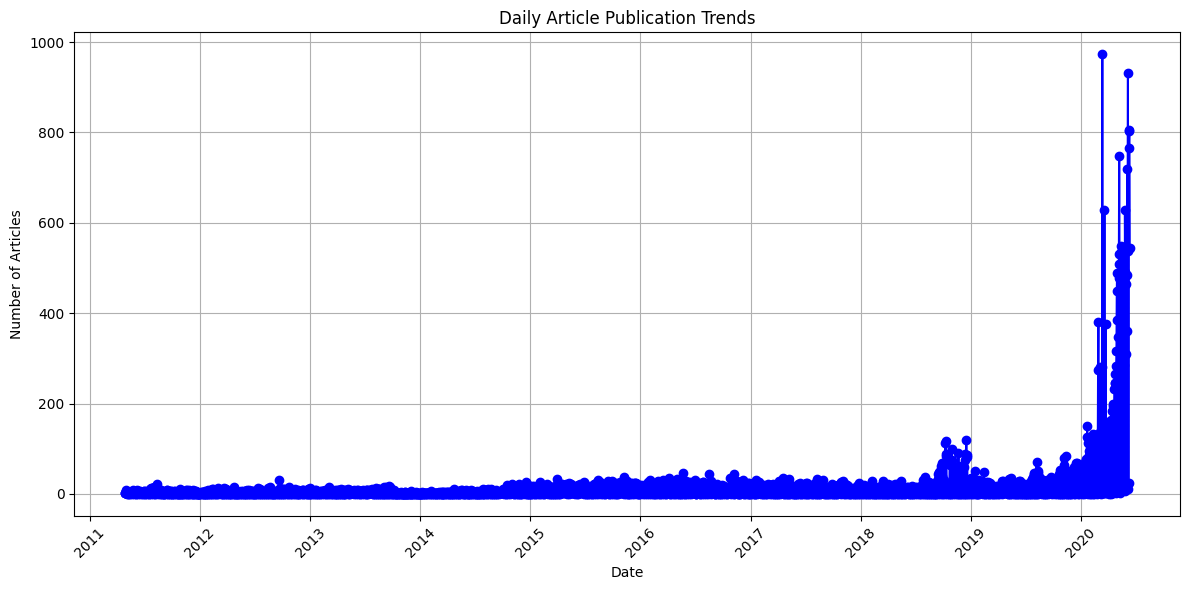

In [61]:
# Convert the 'publication_date' column to datetime
# No need for timezone information
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where publication_date could not be parsed
df = df.dropna(subset=['date'])

# Set the publication date as the index
df.set_index('date', inplace=True)

# Resample the data to count articles per day
daily_counts = df.resample('D').size()

# Plotting the trend of articles over time
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color='b')
plt.title('Daily Article Publication Trends')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# Assuming the CSV has a column named 'publisher'
# Count the number of articles per publisher
publisher_count = df['publisher'].value_counts()

# Display the count of articles per publisher
print(publisher_count)

publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
John Harris              1
Alex Biles               1
Ilir Shkurti             1
Kyle Dennis              1
Usman Rafi               1
Name: count, Length: 225, dtype: int64


In [63]:
#Sentiment analysis and Topic Modelling using Natuaral Language Processing (NLP)
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\you\AppData\Roaming\nltk_data...


In [64]:
sentiment_data=df.copy()
sia = SentimentIntensityAnalyzer()

In [65]:
# perform the sentiment anlysis on 'headlines' column (positive, negative and neutral)
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])
sentiment_data

,Unnamed: 0,headline,url,publisher,stock,headline_length,sentiment
date,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39,0.000
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42,0.000
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29,0.000
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44,0.000
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87,0.296
...,...,...,...,...,...,...,...
2018-01-05 11:47:36-04:00,1413787,Chinese Nano-Cap Momentum Stocks Sharply Highe...,https://www.benzinga.com/movers/18/01/10994518...,Paul Quintaro,ZX,255,0.296
2017-12-06 09:12:01-04:00,1413788,28 Stocks Moving In Wednesday's Pre-Market Ses...,https://www.benzinga.com/news/17/12/10878295/2...,Lisa Levin,ZX,50,0.000
2017-12-06 07:04:31-04:00,1413789,China Zenix Auto International Reports Q3 EPAD...,https://www.benzinga.com/news/earnings/17/12/1...,Paul Quintaro,ZX,69,0.000


In [70]:
# Categorize the sentiment scores
sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=[-1, -0.005, 0, 1], labels=['Negative', 'Neutral', 'Positive'])
sentiment_data

,Unnamed: 0,headline,url,publisher,stock,headline_length,sentiment,sentiment_category
date,,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39,0.000,Neutral
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42,0.000,Neutral
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29,0.000,Neutral
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44,0.000,Neutral
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87,0.296,Positive
...,...,...,...,...,...,...,...,...
2018-01-05 11:47:36-04:00,1413787,Chinese Nano-Cap Momentum Stocks Sharply Highe...,https://www.benzinga.com/movers/18/01/10994518...,Paul Quintaro,ZX,255,0.296,Positive
2017-12-06 09:12:01-04:00,1413788,28 Stocks Moving In Wednesday's Pre-Market Ses...,https://www.benzinga.com/news/17/12/10878295/2...,Lisa Levin,ZX,50,0.000,Neutral
2017-12-06 07:04:31-04:00,1413789,China Zenix Auto International Reports Q3 EPAD...,https://www.benzinga.com/news/earnings/17/12/1...,Paul Quintaro,ZX,69,0.000,Neutral


In [71]:
sentiment_data['sentiment_category'].value_counts()

sentiment_category
Neutral     26075
Positive    16644
Negative    13268
Name: count, dtype: int64

In [86]:
Time_Series_Analysis = pd.DataFrame({'date': daily_counts.index, 'Daily_Headlines_Count': daily_counts.values})
Time_Series_Analysis.set_index('date', inplace=True)

In [87]:
Time_Series_Analysis

,Daily_Headlines_Count
date,
2011-04-27 00:00:00-04:00,1
2011-04-28 00:00:00-04:00,2
2011-04-29 00:00:00-04:00,2
2011-04-30 00:00:00-04:00,1
2011-05-01 00:00:00-04:00,1
...,...
2020-06-07 00:00:00-04:00,25
2020-06-08 00:00:00-04:00,765
2020-06-09 00:00:00-04:00,804


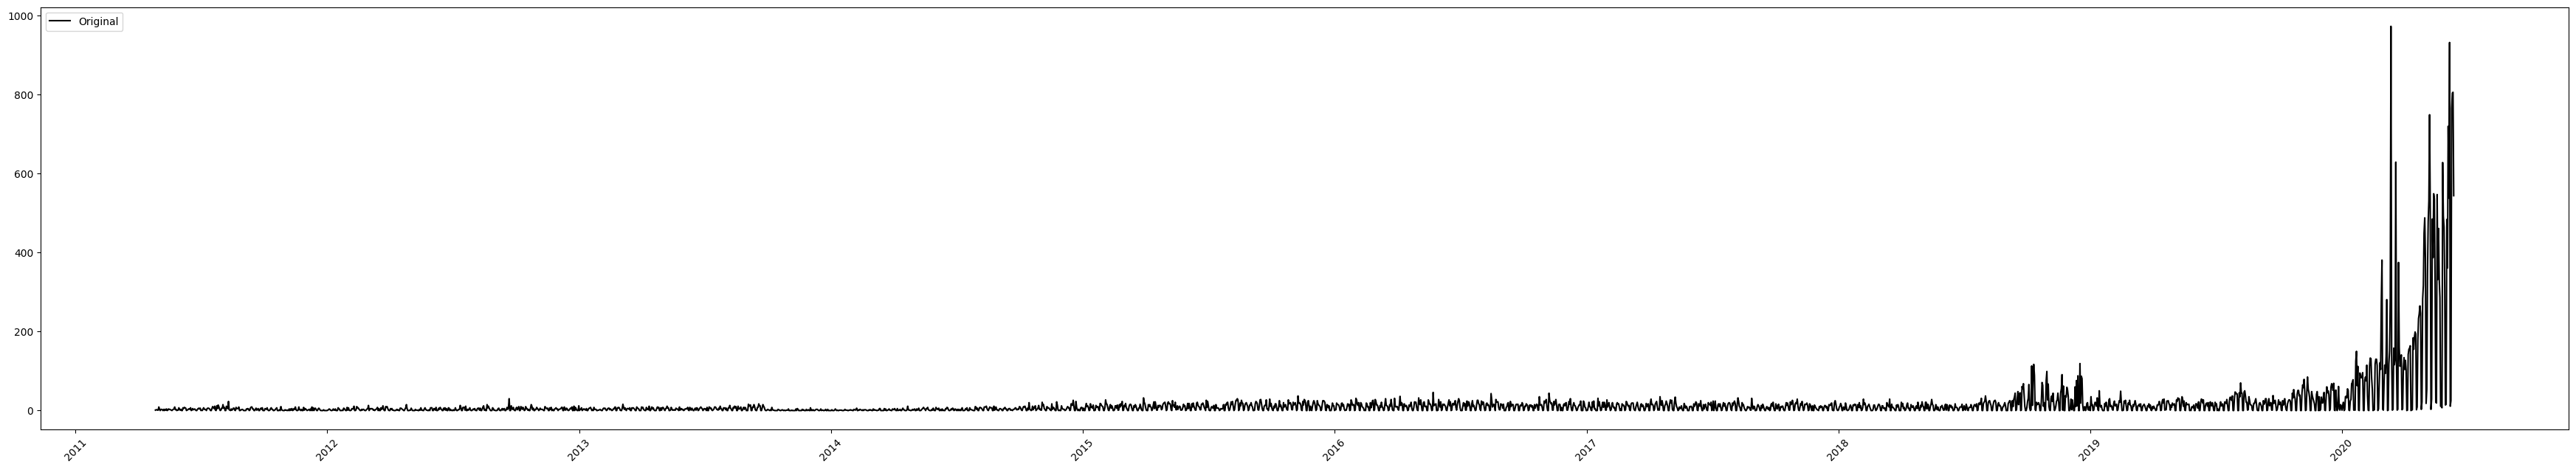

In [92]:
plt.figure(figsize=(35, 25))

plt.subplot(411)
plt.plot(Time_Series_Analysis['Daily_Headlines_Count'], label='Original', color='black')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

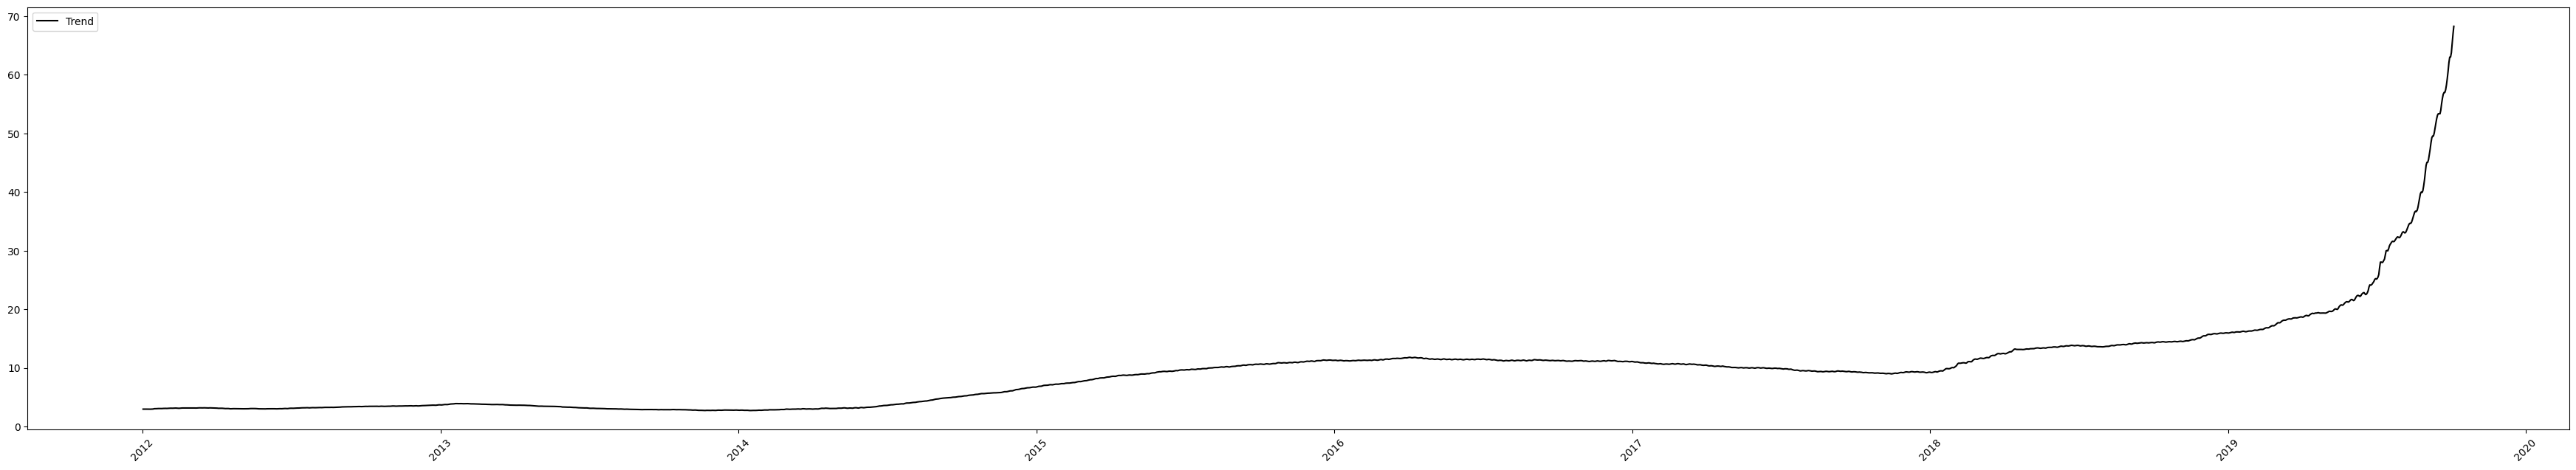

In [99]:
# Seasonal variation analysis of the Time Series Analysis
plt.figure(figsize=(35, 25))
decomposition = seasonal_decompose(Time_Series_Analysis['Daily_Headlines_Count'], model='additive', period=500)

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='black')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

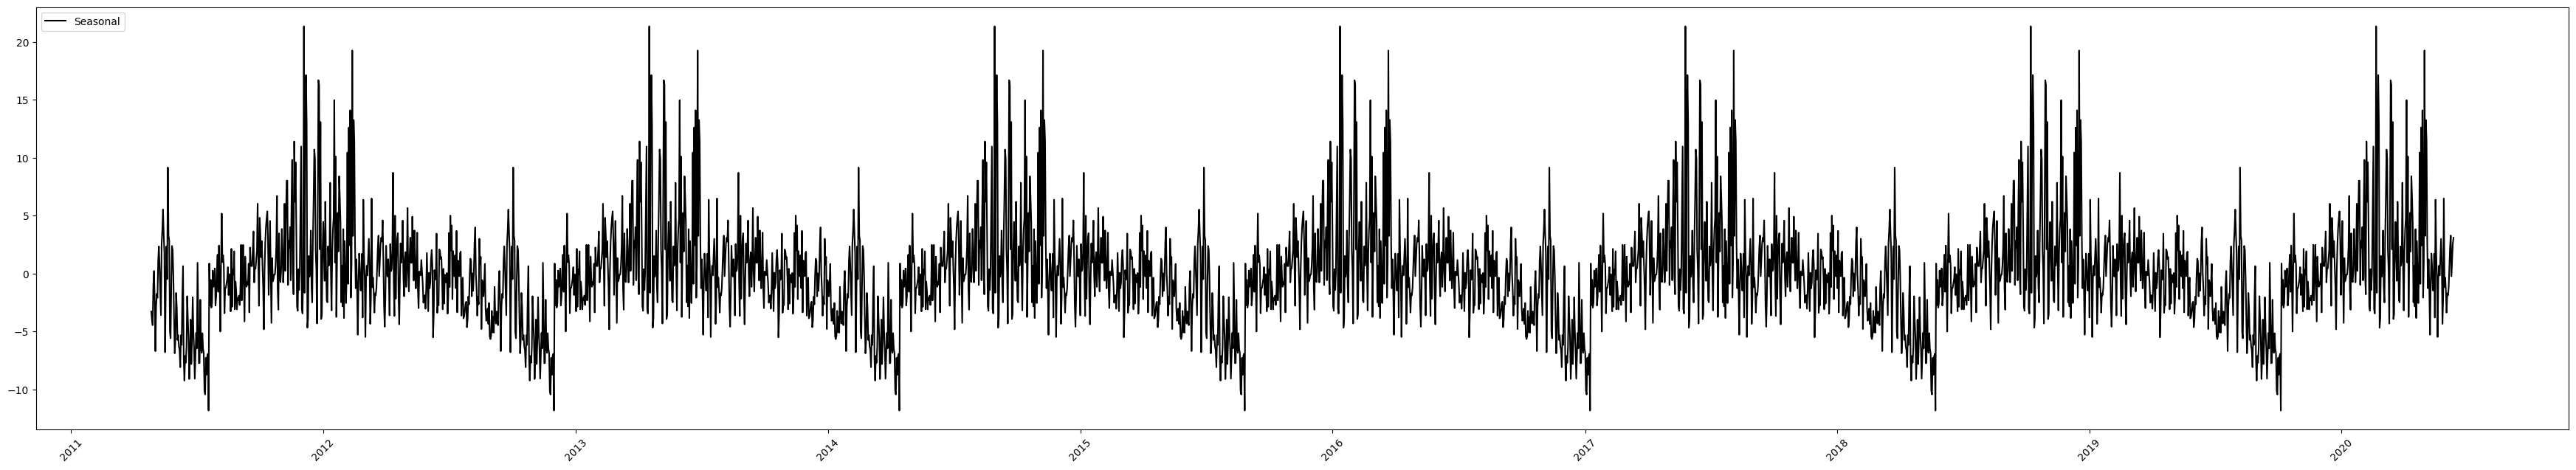

In [101]:
#breaking down the seasonal variation
plt.figure(figsize=(35, 25))
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='black')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

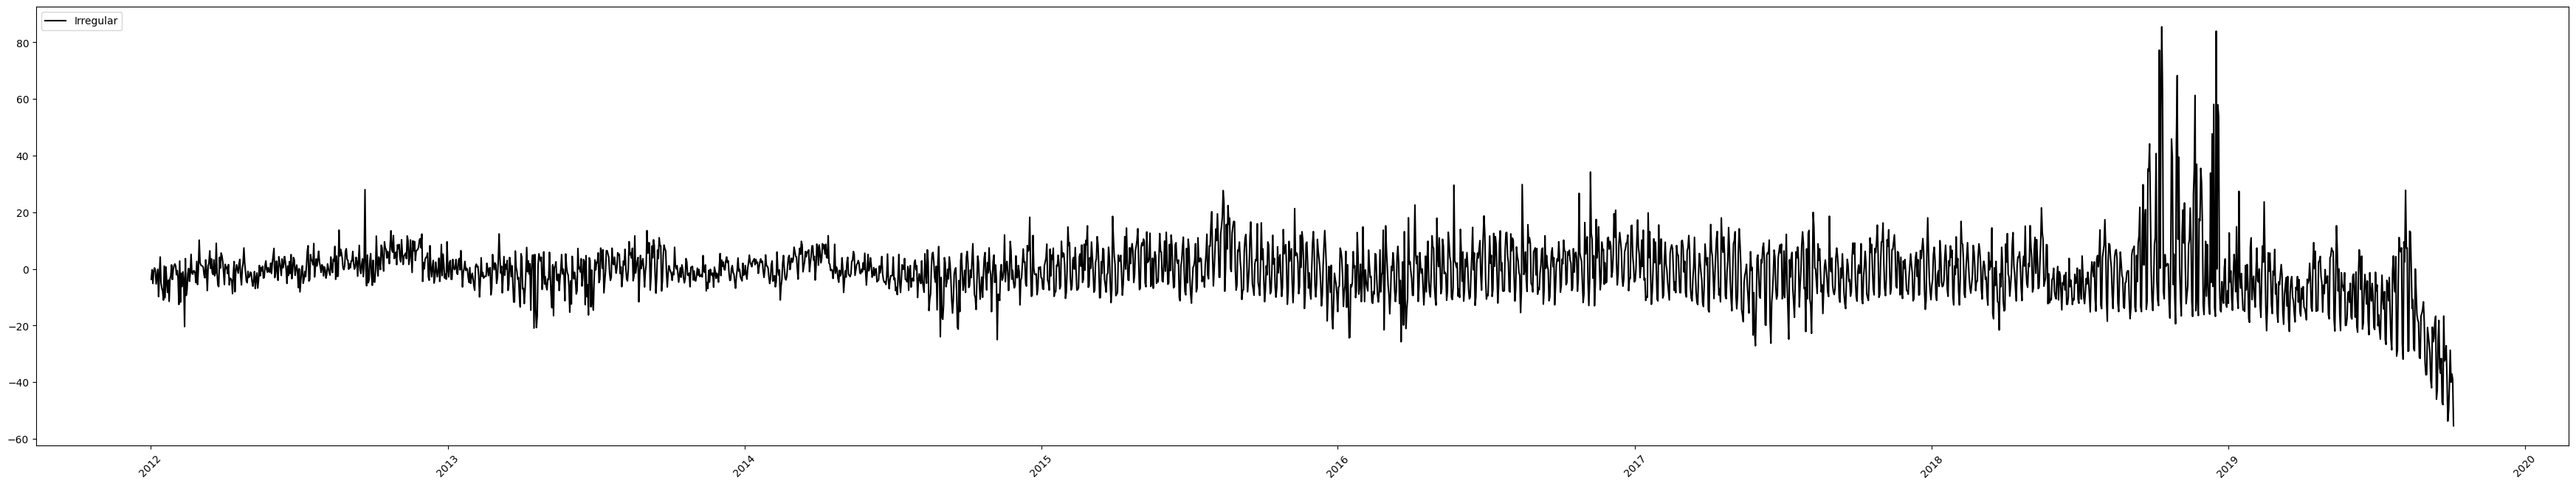

In [102]:
plt.figure(figsize=(35, 25))
plt.subplot(414)
plt.plot(decomposition.resid, label='Irregular', color='black')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

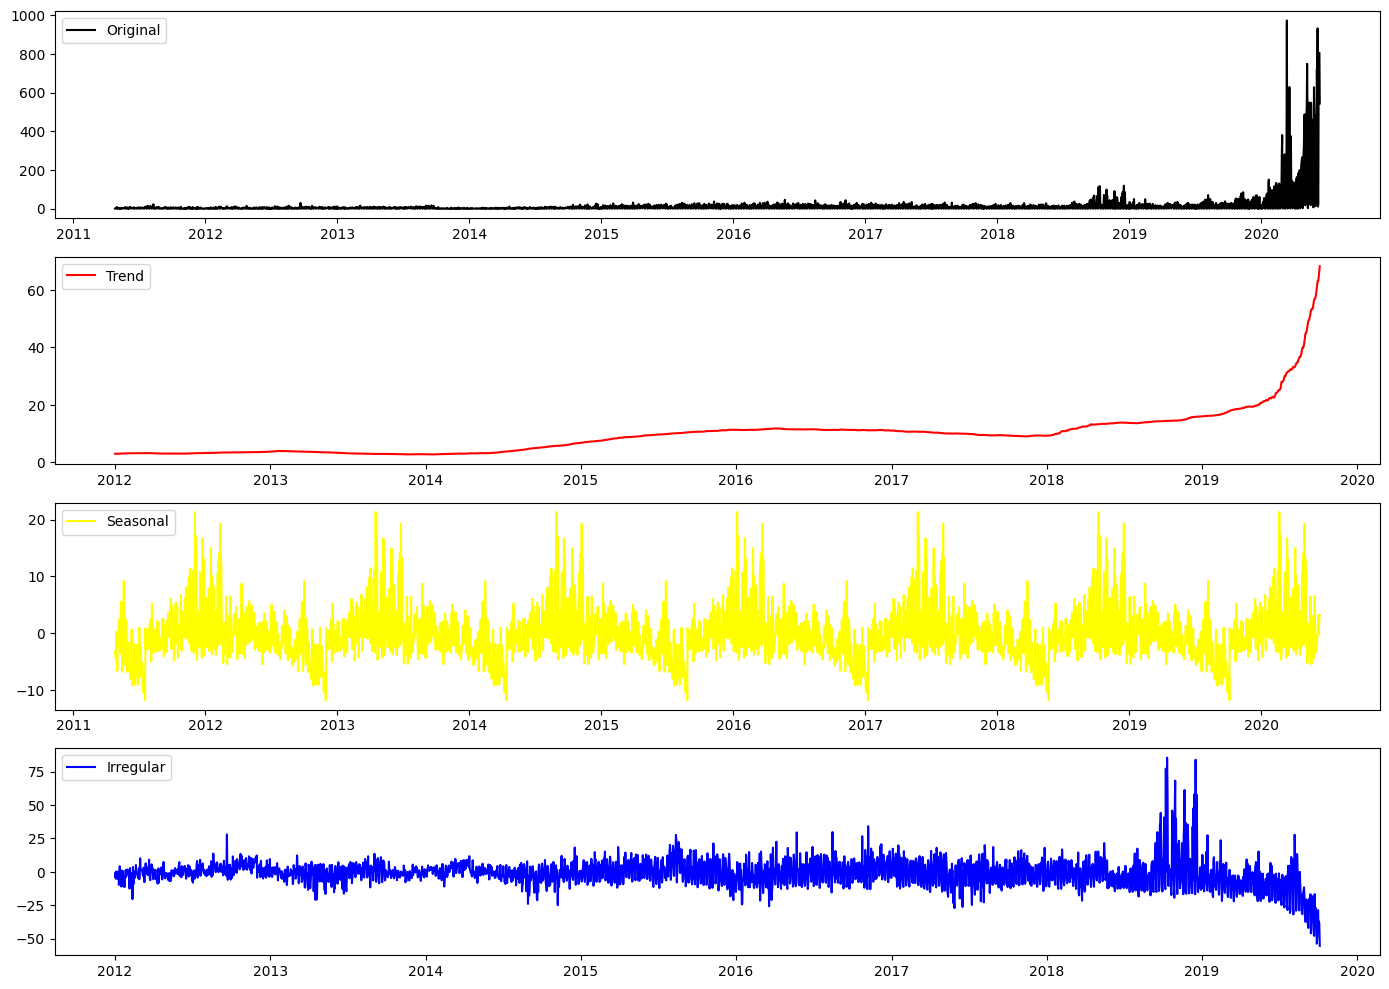

In [103]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2009-02", end="2010-02", freq='D')
daily_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Daily_Headlines_Count': daily_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(Time_Series_Analysis['Daily_Headlines_Count'], model='additive', period=500)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(Time_Series_Analysis['Daily_Headlines_Count'], label='Original', color='black')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Irregular', color='blue')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [107]:
from collections import Counter

# Display the number of articles per publisher
publisher_articles_counts = df['publisher'].value_counts()

# Display the most contributors in publishing articles
highest_publishers = publisher_articles_counts.head(10)
print("The most contributors in publishing articles:\n", highest_publishers)

# Analyze the types of news reported by each publisher  consider a 'category' or 'topic' column categorizing the news
publisher_topic_distribution = df.groupby(['publisher', 'headline']).size().unstack(fill_value=0)
print("Publishers' the most significant areas distribution:\n", publisher_topic_distribution)

# Analyze publisher domains if email addresses are used
df['domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)

# Count the number of articles per domain
domain_counts = df['domain'].value_counts()

# Display the top domains
top_domains = domain_counts.head(10)
print("The most significant areas of publishing:\n", top_domains)

# Compare domain contributions
publisher_domain_distribution = df.groupby(['domain', 'headline']).size().unstack(fill_value=0)
print("publishing area distribution:\n", publisher_domain_distribution)

The most contributors in publishing articles:
 publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64
Publishers' the most significant areas distribution:
 headline                   "Nuclear Verdict" Kills 540 Truck Carrier  \
publisher                                                              
AARP                                                               0   
Aaron Jackson.Ed                                                   0   
Aaron Levitt                                                       0   
Abe Raymond                                                        0   
Abhi Rao                                                           0   
...                                                              ...   
lbjacobi         

Column names in the DataFrame: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'stock',
       'headline_length', 'domain'],
      dtype='object')
Articles per Publisher:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
John Harris              1
Alex Biles               1
Ilir Shkurti             1
Kyle Dennis              1
Usman Rafi               1
Name: count, Length: 225, dtype: int64

News Type Contribution by Publisher:
stock                      A  AA  AAC  AADR  AAL  AAMC  AAME  AAN  AAOI  AAON  \
publisher                                                                       
AARP                       0   0    0     0    0     0     0    0     0     0   
Aaron Jackson.Ed           0   0    0     0    0     0     0    0     0     0   
Aaron Levitt               0   0    0     0    0     0     0    0     0     0   
Abe Raymond                0   0   

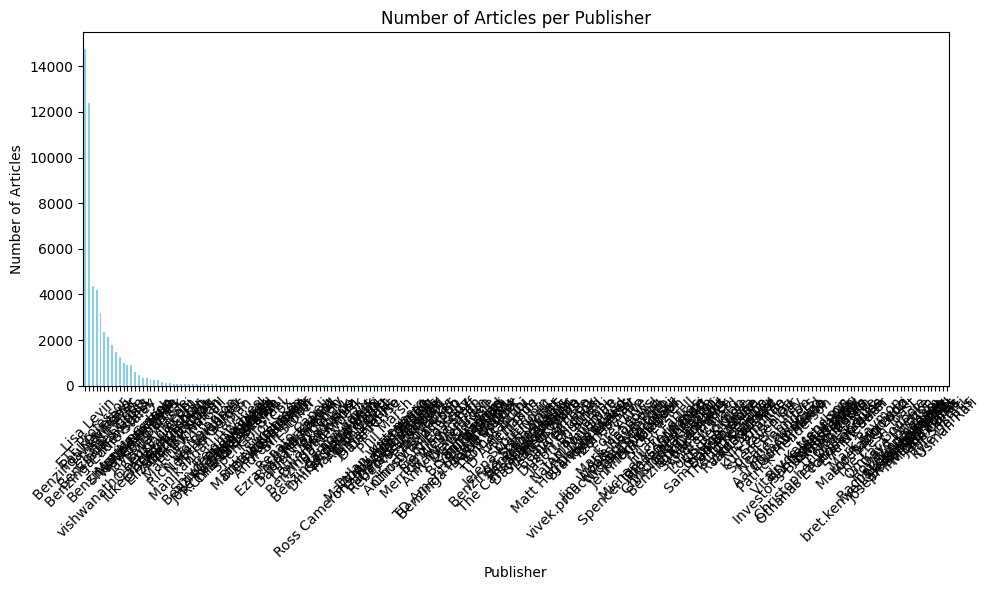

In [108]:
# Check the column names to find the correct ones
print("Column names in the DataFrame:", df.columns)

# Assuming the CSV has columns 'publisher' and 'category' (or equivalent)
publisher_column = 'publisher'  # Update this if necessary
category_column = 'stock'      # Update this if necessary

# Count articles per publisher
publisher_counts = df[publisher_column].value_counts()

# Display the count of articles per publisher
print("Articles per Publisher:")
print(publisher_counts)

# Analyze the type of news reported by each publisher
type_counts = df.groupby(publisher_column)[category_column].value_counts().unstack(fill_value=0)

# Display the type of news reported by each publisher
print("\nNews Type Contribution by Publisher:")
print(type_counts)

# Optional: Plotting the results
import matplotlib.pyplot as plt

# Plotting the articles per publisher
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [109]:
# Plotting the news type contribution
type_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('News Type Contribution by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend(title='News Type')
plt.tight_layout()
plt.show()